In [0]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [0]:
def matB(a):
  A = np.zeros([16, 16])
  A = A*0j
  p = np.exp(a*1j)
  q = np.exp(-a*1j)
  for i in [0,4]:
    A[i,i] = p
    A[1+i,1+i] = p
    A[2+i,2+i] = q
    A[3+i,3+i] = q

  for i in [8,12]:
    A[i,i] = q
    A[1+i,1+i] = q
    A[2+i,2+i] = p
    A[3+i,3+i] = p  
  return A
    
def matC12(a):
  A = np.zeros([16, 16])
  A = A*0j
  p = np.cos(2*a)
  q = np.sin(2*a)*1j
  for i in range(4):
    A[i,i] = 1
  for i in range(8):
    A[4+i, 4+i] = p  
  for i in range(4):
    A[12+i, 12+i] = 1
  x = 4
  y = 8
  for i in range(4):
    A[x,y] = q
    x = x + 1
    y = y + 1
  x = 8
  y = 4
  for i in range(4):
    A[x,y] = q    
    x = x + 1
    y = y + 1    
  return A  


def matC34(a):
  A = np.zeros([16, 16])
  A = A*0j
  p = np.cos(2*a)
  q = np.sin(2*a)*1j
  A[0, 0] = 1
  z = np.array([(p, q),
          (q, p)]) 
  A[1:3, 1:3] = z  
  A[3, 3] = 1
  A[4, 4] = 1
  A[5:7, 5:7] = z  
  A[7, 7] = 1
  A[8, 8] = 1  
  A[9:11, 9:11] = z  
  A[11, 11] = 1
  A[12, 12] = 1   
  A[13:15, 13:15] = z 
  A[15, 15] = 1
  
  return A  
  

In [7]:
def H(a):
  A = np.zeros([16, 16])
  A = A*0j  
  A[0, 0] = 1
  p = 1
  q = -1
  z = np.array([(p, p),
          (p, q)])     
  A[1:3, 1:3] = z  
  A[3, 3] = -1
  A[4, 4] = 1
  A[5:7, 5:7] = z  
  A[7, 7] = -1
  A[8, 8] = -1
  
  s = np.array([(q, p),
          (p, p)])  
  A[9:11, 9:11] = s  
  A[11, 11] = 1
  A[12, 12] = -1   
  A[13:15, 13:15] = s 
  A[15, 15] = 1
  
  for i in range(4):
    A[4+i, 8+i] = 1
  for i in range(4):
    A[8+i, 4+i] = 1    
    
  return A  

def C1(a):
  A = np.zeros([16, 16])
  A = A*0j  
  
  for i in range(8):
    A[8+i, 0+i] = 1
    
  return A  


def ut(t):
  u = np.zeros((16, 16))
  A = H(1)
  w, v = LA.eig(A)

  for i in range(16):
    a = np.transpose(v[:, i])
    a = a.reshape(16, 1)
    b = np.matrix.getH(a).reshape(1, 16)
    u = u + np.exp(-w[i]*1j * t ) * a.dot(b)
  return(u)


A = H(1)
w, v = LA.eig(A)
C = C1(1)
psi0  = C.dot(v[:, 8])
psi0 = psi0/np.sqrt(sum(psi0 * np.matrix.getH(psi0))) 

psi0R = psi0.reshape(16, 1)
psi0L = np.matrix.getH(psi0).reshape(1, 16)

C1(1)

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.

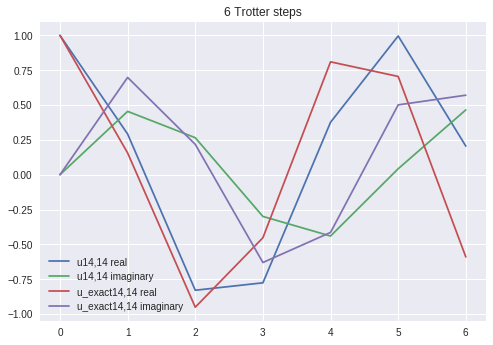

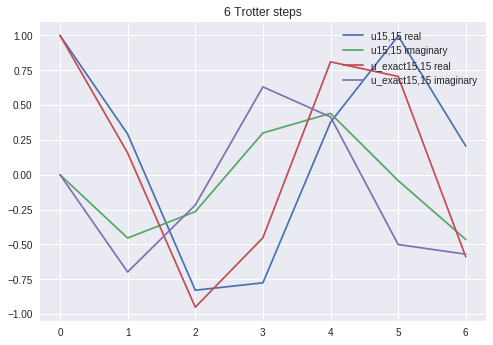

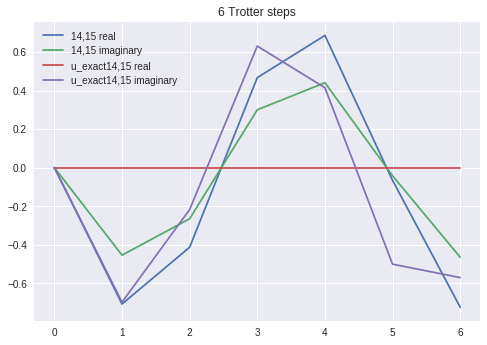

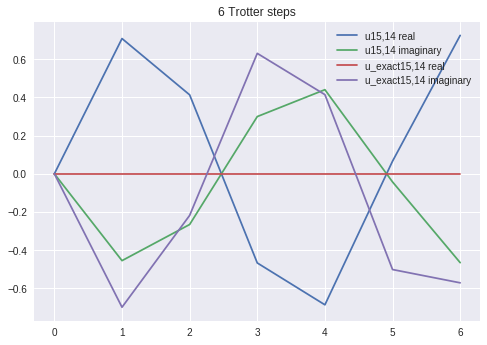

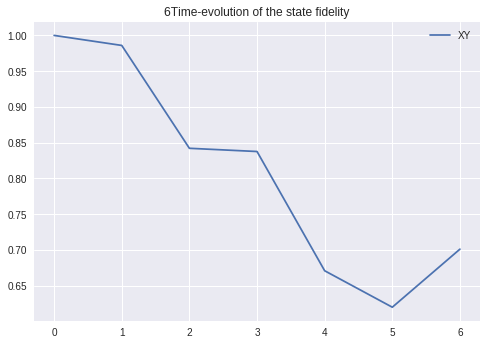

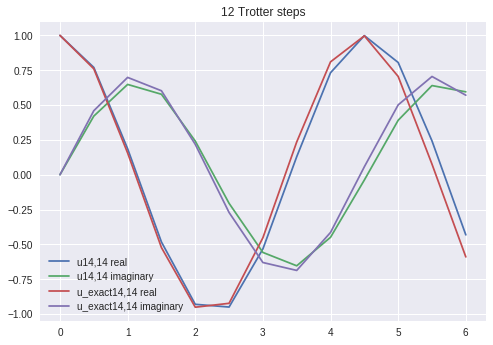

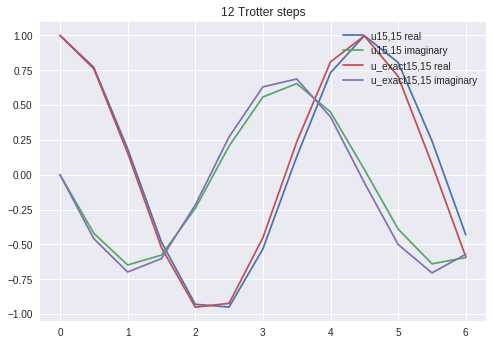

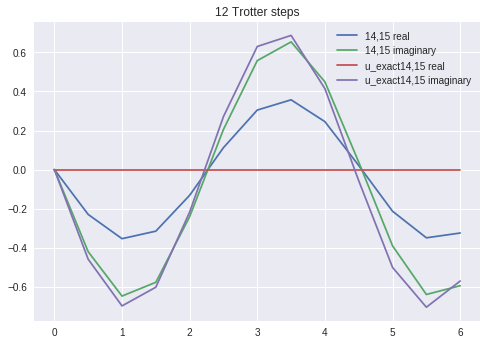

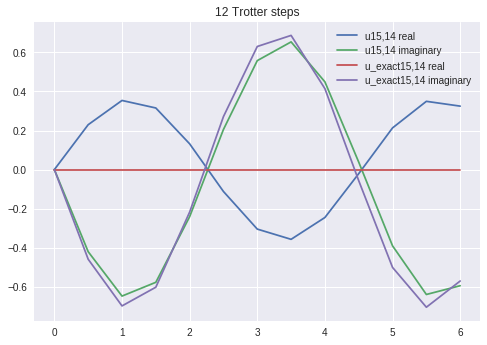

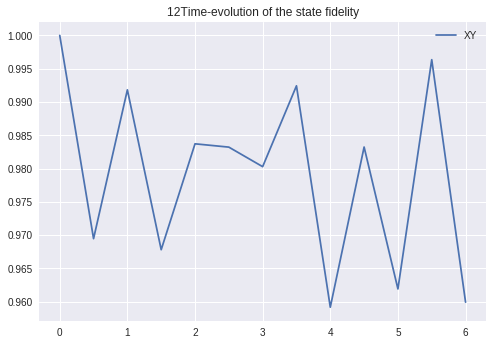

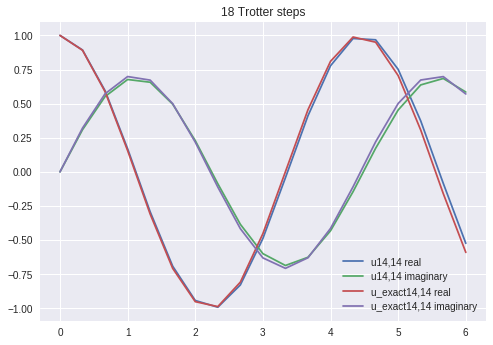

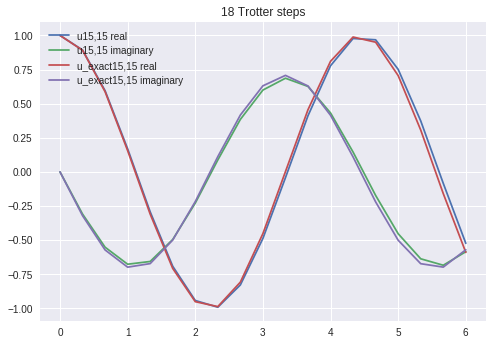

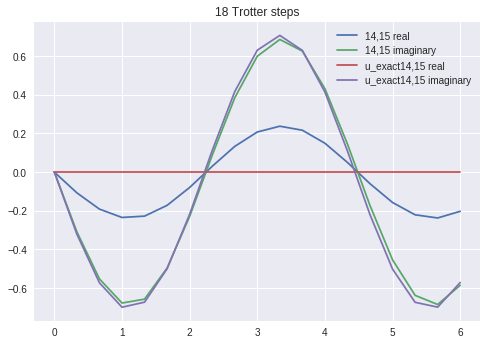

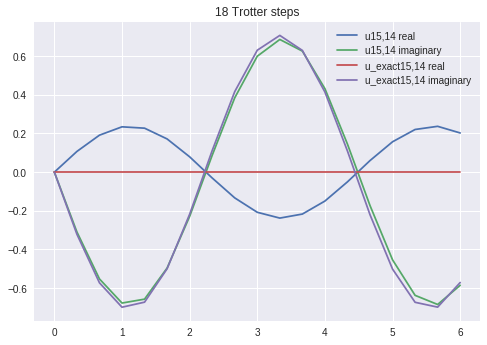

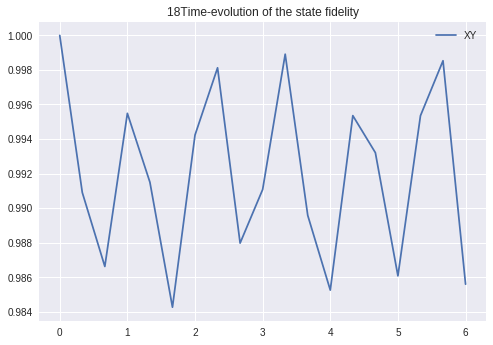

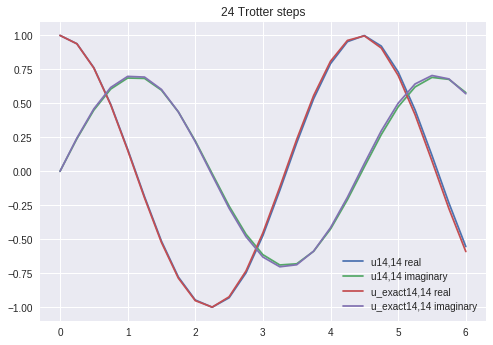

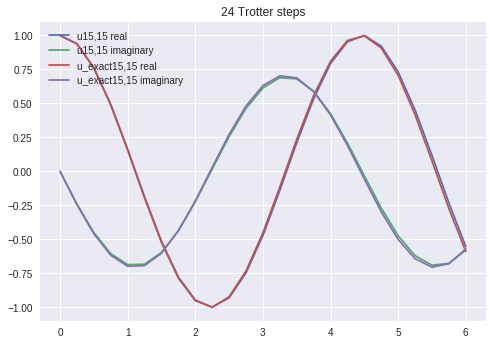

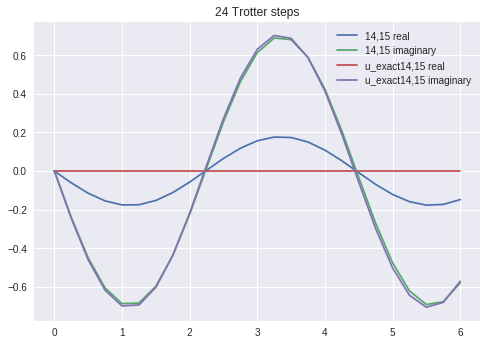

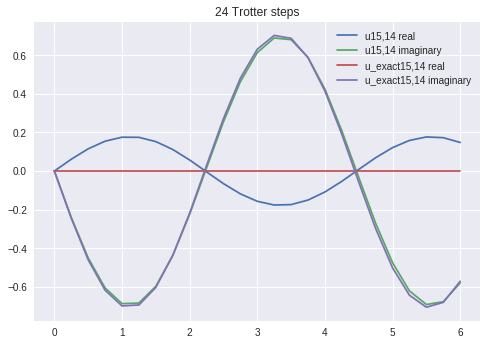

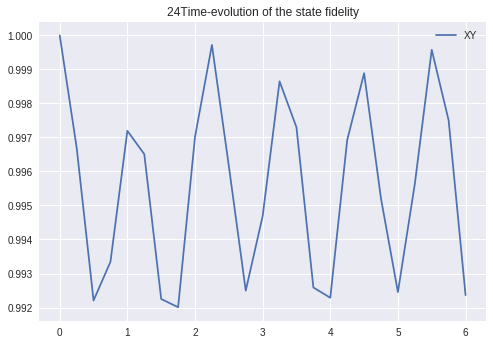

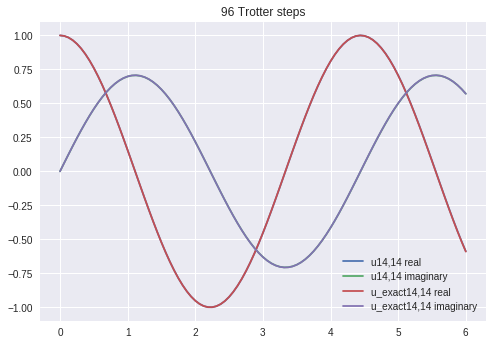

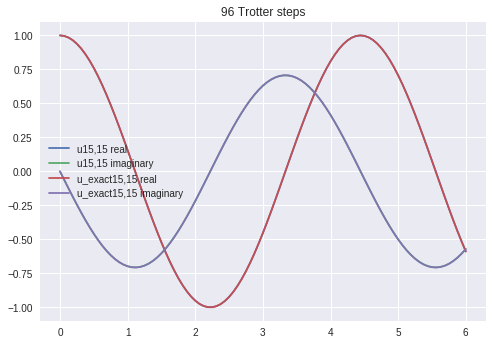

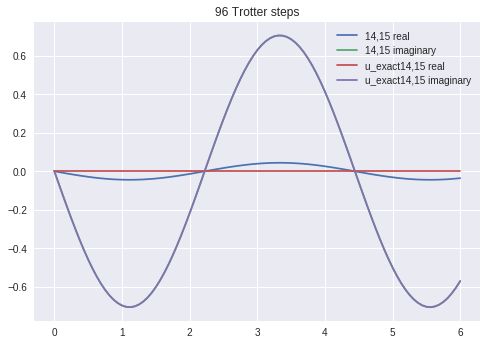

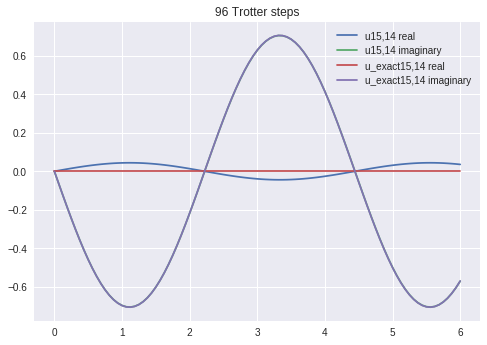

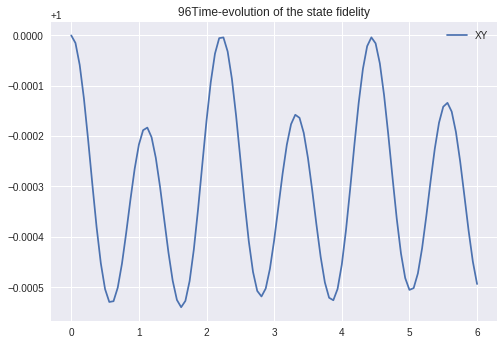

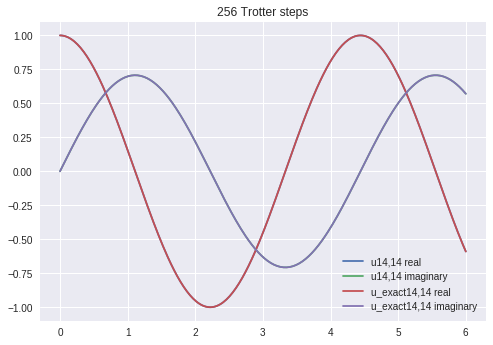

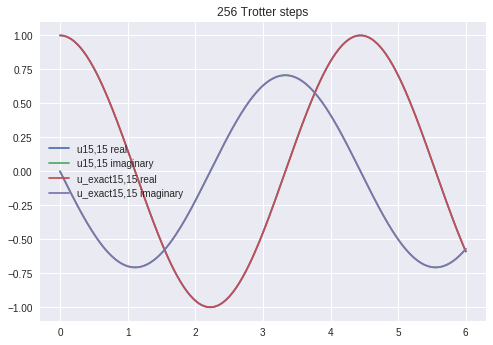

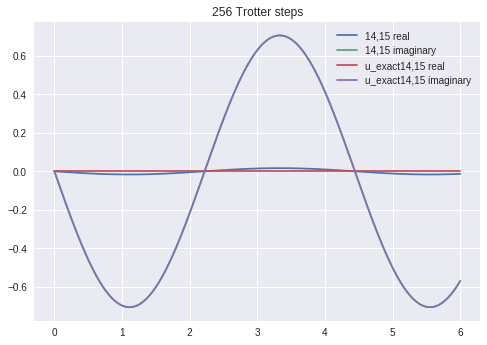

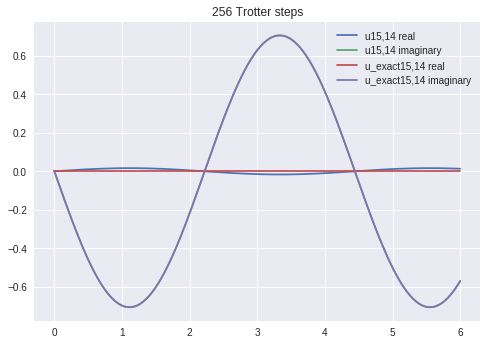

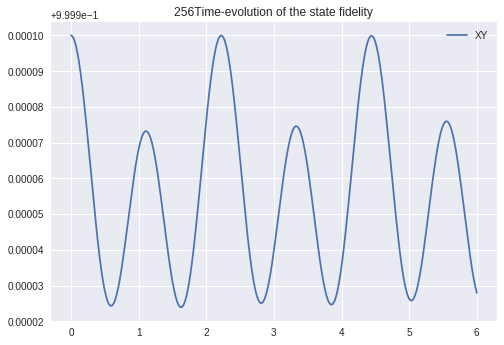

In [12]:
V = 1
U = 4
tau = 6
for N in [6,12,18,24,96,256]:
    a = -(V/2)*(tau/N)
    b = -(U/4)*(tau/N)
    A = matC12(a)
    C = matC34(a)
    B = matB(b)
    k0 = A.dot(C)
    k0 = k0.dot(B)
    
    k = np.identity(16)
    u22 = [k[13, 13]]
    u23 = [k[13, 14]]
    u32 = [k[14, 13]]
    u33 = [k[14, 14]]

    ue22 = [k[13, 13]]
    ue23 = [k[13, 14]]
    ue32 = [k[14, 13]]
    ue33 = [k[14, 14]]    
    
    tlist = [0.0] 
    

    
    fi = [1]
    
    
    for i in range(N):
      k = k.dot(k0)
      
      l = ut( (i+1) *tau/ N)
      lc = np.matrix.getH(l)
      
      fi.append(psi0L.dot(lc.dot(k.dot(psi0R))))
      
      
      ue22.append(l[13, 13])
      ue33.append(l[14, 14])
      ue23.append(l[13, 14]) 
      ue32.append(l[14, 13])      
      
      
      u22.append(k[13, 13])
      u33.append(k[14, 14])
      u23.append(k[13, 14])
      u32.append(k[14, 13])
      tlist.append((i+1) *tau/N)

      
    u22 = np.array(u22)
    u33 = np.array(u33)
    u23 = np.array(u23)
    u32 = np.array(u32)

    ue22 = np.array(ue22)
    ue33 = np.array(ue33)
    ue23 = np.array(ue23)
    ue32 = np.array(ue32)    
    
    fi = np.array(fi)
    
    
   
    plt.plot(tlist,u22.real, label = 'u14,14 real')
    plt.plot(tlist,u22.imag, label = 'u14,14 imaginary')
    plt.plot(tlist,ue22.real, label = 'u_exact14,14 real')
    plt.plot(tlist,ue22.imag, label = 'u_exact14,14 imaginary')
    
    
    plt.legend()
    plt.title(str(N)+' Trotter steps')
    
    plt.show()   
    
    plt.plot(tlist,u33.real, label = 'u15,15 real')
    plt.plot(tlist,u33.imag, label = 'u15,15 imaginary')
    plt.plot(tlist,ue33.real, label = 'u_exact15,15 real')
    plt.plot(tlist,ue33.imag, label = 'u_exact15,15 imaginary')
    
    
    
    plt.legend()
    plt.title(str(N)+' Trotter steps')
    
    plt.show()   
    
    plt.plot(tlist,u23.real, label = '14,15 real')
    plt.plot(tlist,u23.imag, label = '14,15 imaginary')
    plt.plot(tlist,ue23.real, label = 'u_exact14,15 real')
    plt.plot(tlist,ue23.imag, label = 'u_exact14,15 imaginary')
    
    plt.legend()
    plt.title(str(N)+' Trotter steps')
    
    plt.show()   
    plt.plot(tlist,u32.real, label = 'u15,14 real')
    plt.plot(tlist,u32.imag, label = 'u15,14 imaginary')
    plt.plot(tlist,ue32.real, label = 'u_exact15,14 real')
    plt.plot(tlist,ue32.imag, label = 'u_exact15,14 imaginary')
    
    
    plt.legend()
    plt.title(str(N)+' Trotter steps')
    plt.show()     
    
    plt.plot(tlist, abs(fi)**2, label = 'XY')

    plt.legend()
    plt.title(str(N)+'Time-evolution of the state fidelity')
    plt.show()   
    